<a href="https://colab.research.google.com/github/Ulquoirra-rn/Task/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai import *      
from fastai.tabular import *
from fastai.tabular.all import *
import fastai
import seaborn as sns

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bsightai/Task1/train.csv', index_col='ID')
train_df.describe(include='all')

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
count,800.000000,800.00000,800.000000,800.00000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,...,800,800,800,800,800,800,800.000000,800,800,800.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,12,2,2,61,2,NaN,1,6,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,f,White-European,no,no,United States,no,NaN,18 and more,Self,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,415,211,604,683,148,765,NaN,800,617,NaN
mean,0.582500,0.28625,0.321250,0.41500,0.457500,0.20875,0.273750,0.717500,0.316250,0.460000,...,NaN,NaN,NaN,NaN,NaN,NaN,7.058530,NaN,NaN,0.231250
std,0.493455,0.45229,0.467249,0.49303,0.498502,0.40667,0.446161,0.450497,0.465303,0.498709,...,NaN,NaN,NaN,NaN,NaN,NaN,3.788969,NaN,NaN,0.421896
min,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,-2.594654,NaN,NaN,0.000000
25%,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,4.527556,NaN,NaN,0.000000
50%,1.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,6.893472,NaN,NaN,0.000000
75%,1.000000,1.00000,1.000000,1.00000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.892981,NaN,NaN,0.000000


In [ ]:
train_df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [ ]:
train_df.dtypes

A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jaundice            object
austim              object
contry_of_res       object
used_app_before     object
result             float64
age_desc            object
relation            object
Class/ASD            int64
dtype: object

In [ ]:
cat_col = list(train_df.select_dtypes(include='object').columns)
for col in cat_col:
    train_df[col] = train_df[col].astype('category')

train_df.dtypes

A1_Score              int64
A2_Score              int64
A3_Score              int64
A4_Score              int64
A5_Score              int64
A6_Score              int64
A7_Score              int64
A8_Score              int64
A9_Score              int64
A10_Score             int64
age                 float64
gender             category
ethnicity          category
jaundice           category
austim             category
contry_of_res      category
used_app_before    category
result              float64
age_desc           category
relation           category
Class/ASD             int64
dtype: object

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bsightai/Task1/test.csv', index_col='ID')
test_df.describe(include='all')

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200,200,200,200,200,200,200.000000,200,200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,12,2,2,44,2,NaN,1,6
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,White-European,no,no,United States,no,NaN,18 and more,Self
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110,48,156,176,34,188,NaN,200,166
mean,0.585000,0.285000,0.355000,0.450000,0.475000,0.21000,0.285000,0.725000,0.330000,0.390000,27.875051,NaN,NaN,NaN,NaN,NaN,NaN,6.912688,NaN,NaN
std,0.493958,0.452547,0.479714,0.498742,0.500628,0.40833,0.452547,0.447635,0.471393,0.488974,12.489213,NaN,NaN,NaN,NaN,NaN,NaN,3.949887,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,7.822865,NaN,NaN,NaN,NaN,NaN,NaN,-1.721289,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,18.889947,NaN,NaN,NaN,NaN,NaN,NaN,4.303175,NaN,NaN
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,24.754095,NaN,NaN,NaN,NaN,NaN,NaN,7.138223,NaN,NaN
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,31.165789,NaN,NaN,NaN,NaN,NaN,NaN,9.756596,NaN,NaN


In [ ]:
test_df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
dtype: int64

In [ ]:
test_df.dtypes


A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jaundice            object
austim              object
contry_of_res       object
used_app_before     object
result             float64
age_desc            object
relation            object
dtype: object

In [ ]:
cat_col = list(test_df.select_dtypes(include='object').columns)
for col in cat_col:
    test_df[col] = test_df[col].astype('category')

test_df.dtypes

A1_Score              int64
A2_Score              int64
A3_Score              int64
A4_Score              int64
A5_Score              int64
A6_Score              int64
A7_Score              int64
A8_Score              int64
A9_Score              int64
A10_Score             int64
age                 float64
gender             category
ethnicity          category
jaundice           category
austim             category
contry_of_res      category
used_app_before    category
result              float64
age_desc           category
relation           category
dtype: object

In [ ]:
train_df.drop("age_desc", axis=1, inplace=True)
test_df.drop("age_desc", axis=1, inplace=True)

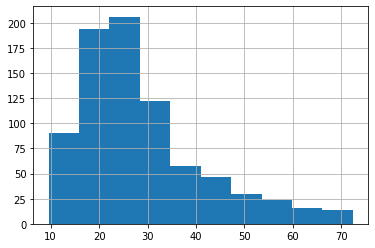

In [ ]:
train_df['age'].hist()

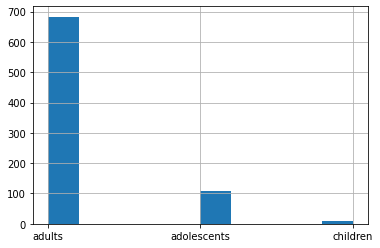

In [ ]:
def group_age(age):
    if age <= 3:
        return "infant"
    elif age >3 and age < 12:
        return "children"
    elif age>=12 and age<17:
        return "adolescents"
    else:
        return "adults"
        
    
train_df["age_group"] = train_df["age"].apply(lambda x: group_age(x))
train_df["age_group"].hist()

test_df["age_group"] = test_df["age"].apply(lambda x: group_age(x))


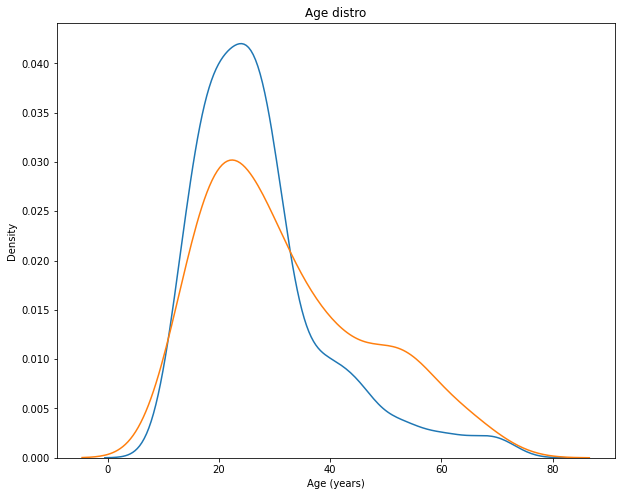

In [ ]:
plt.figure(figsize = (10, 8))


sns.kdeplot(train_df.loc[train_df['Class/ASD'] == 0, 'age'], label = "Class/ASD == 0")


sns.kdeplot(train_df.loc[train_df['Class/ASD'] == 1, 'age'], label = 'Class/ASD == 1')


plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Age distro');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


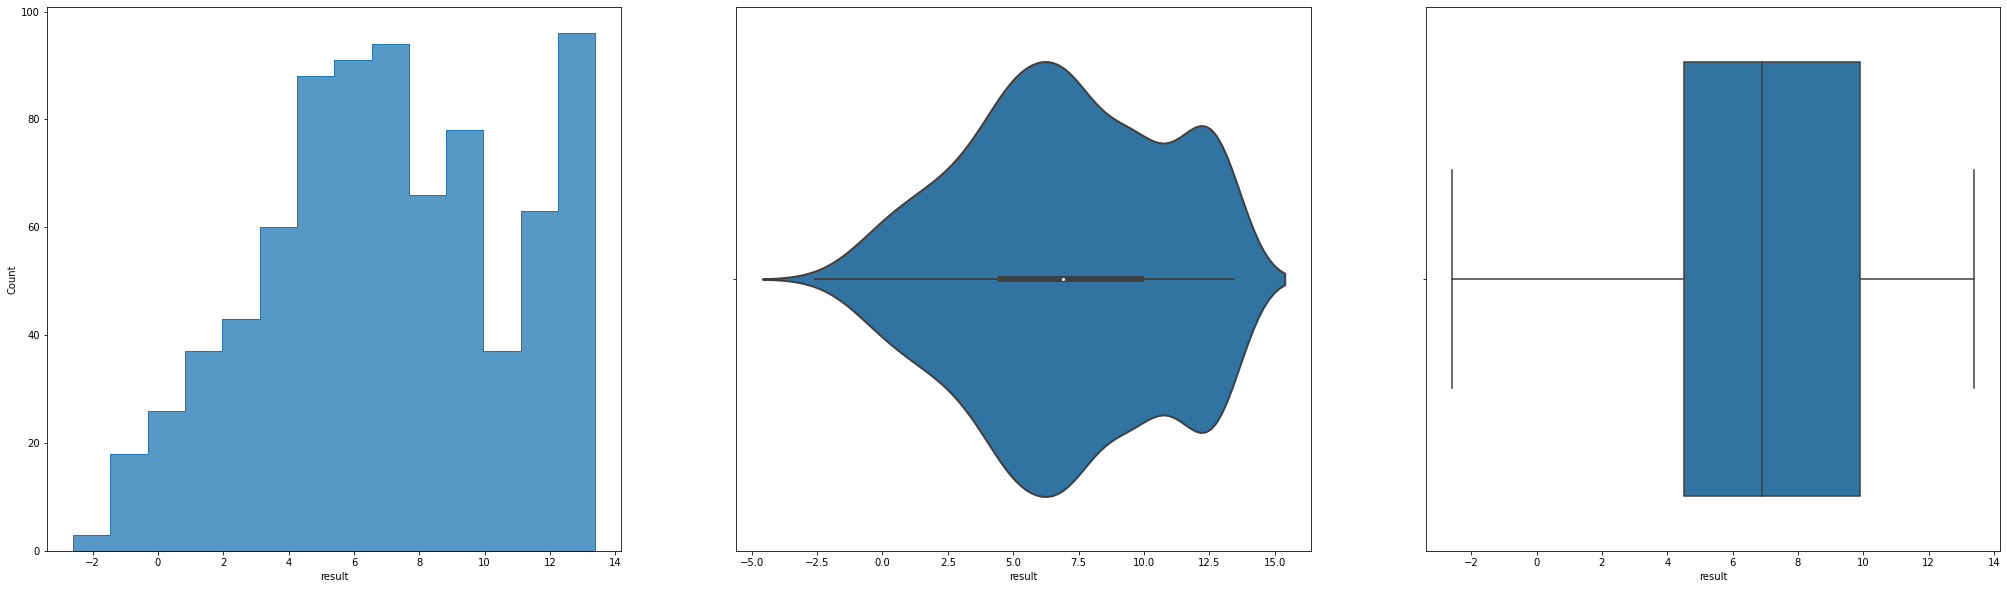

In [ ]:
f,ax = plt.subplots(1, 3, figsize=(35, 10))
sns.histplot(data=train_df, x='result', element='step', ax=ax[0])
sns.violinplot(train_df.result, edgecolor='black', linewidth=2, ax=ax[1])
sns.boxplot(train_df.result, ax=ax[2])
plt.show()


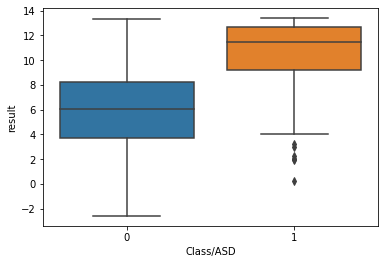

In [ ]:
sns.boxplot(x=train_df["Class/ASD"], y = train_df.result )


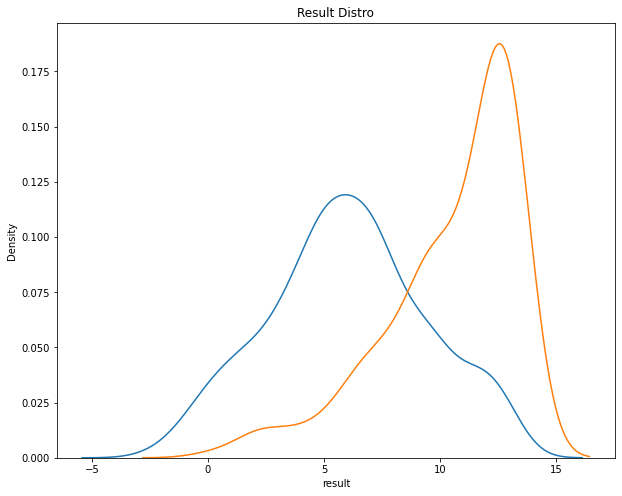

In [ ]:
plt.figure(figsize = (10, 8))
sns.kdeplot(train_df.loc[train_df['Class/ASD'] == 0, 'result'], label = "Class/ASD == 0")
sns.kdeplot(train_df.loc[train_df['Class/ASD'] == 1, 'result'], label = 'Class/ASD == 1')
plt.xlabel('result'); plt.ylabel('Density'); plt.title('Result Distro');

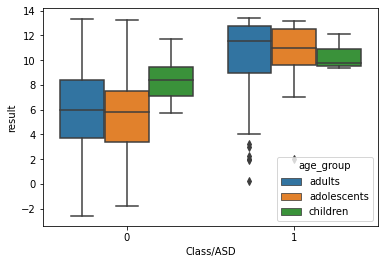

In [ ]:
sns.boxplot(x=train_df["Class/ASD"], y = train_df.result, hue= train_df.age_group)

In [ ]:
train_df["result_10"] = train_df["result"] > 10 
test_df["result_10"] = test_df["result"] > 10 

In [ ]:
temp_df = train_df[(train_df['age_group'] == "adults") & (train_df['result'] < 10) & (train_df['Class/ASD'] == 1)] 
print(temp_df.shape)

(57, 22)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


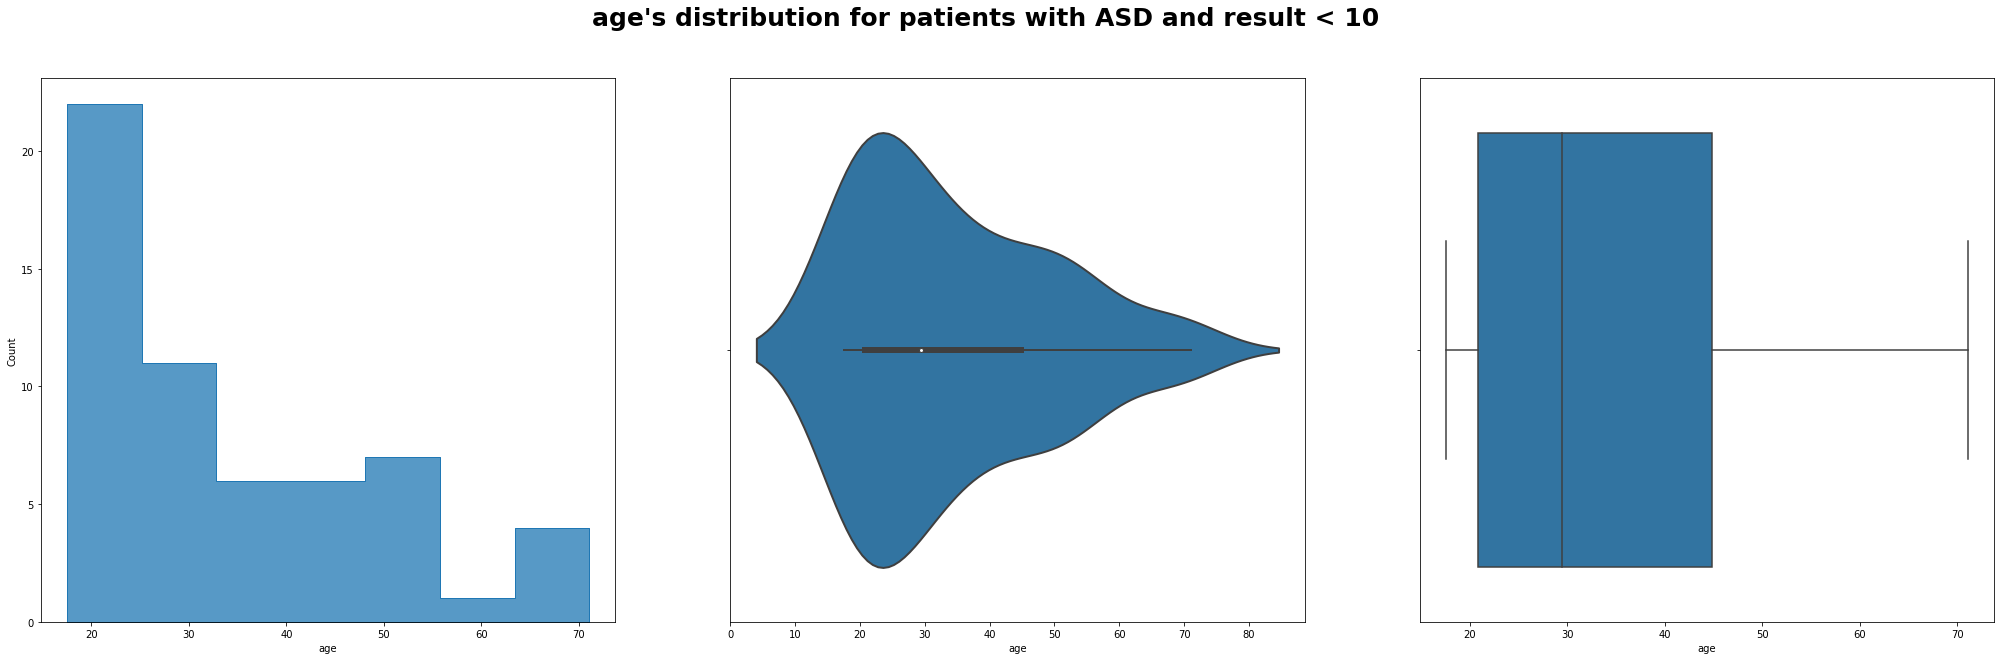

In [ ]:
f, ax = plt.subplots(1, 3, figsize=(35, 10))
sns.histplot(data=temp_df, x='age', element='step', ax=ax[0])
sns.violinplot(temp_df.age, edgecolor='black', linewidth=2, ax=ax[1])
sns.boxplot(temp_df.age, ax=ax[2])
f.suptitle("age's distribution for patients with ASD and result < 10", weight='bold', size=25)
plt.show()

In [ ]:
temp_df["age"]

ID
10     17.964599
16     36.084360
25     37.919755
29     44.856760
43     37.115664
78     29.660316
96     28.247515
114    19.539286
133    18.741651
137    71.084191
142    47.988009
156    20.850874
159    17.495963
161    37.382049
176    27.977107
181    53.312137
186    18.534367
209    42.172939
228    49.343551
241    48.530594
257    19.764786
270    64.784648
285    29.419024
302    30.868333
315    42.899396
319    68.005070
320    31.666533
369    53.273256
384    55.318247
413    21.480139
414    25.992192
419    18.878002
423    25.110129
424    22.918169
429    19.338168
439    18.129311
448    26.165968
469    48.114710
471    28.302618
473    35.557997
534    19.290637
566    55.889949
583    42.154625
593    29.311981
596    54.552955
601    69.032221
606    24.990994
657    37.220733
669    20.539864
706    19.742741
716    24.002370
717    24.918197
730    17.919739
746    21.023127
769    30.705376
773    51.061416
798    18.242557
Name: age, dtype: float64

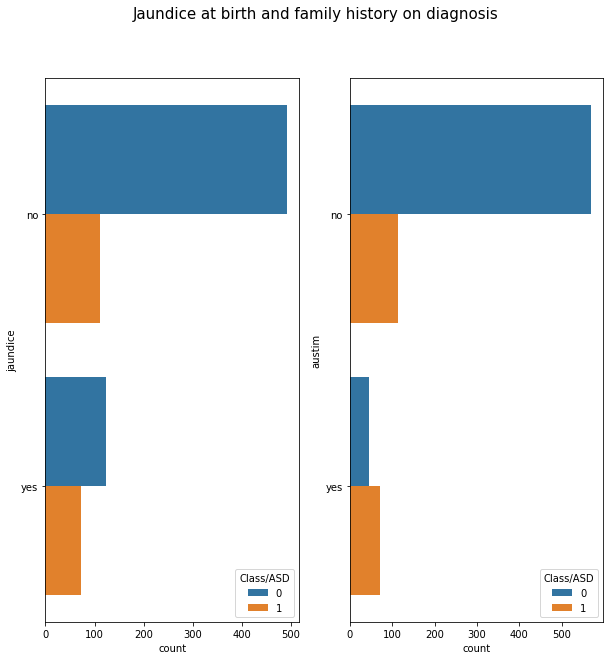

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(10, 10))
sns.countplot(data= train_df, y="jaundice", hue="Class/ASD", ax=ax[0])
sns.countplot(data= train_df, y="austim", hue="Class/ASD",ax=ax[1])
f.suptitle("Jaundice at birth and family history on diagnosis", size=15)
plt.show()

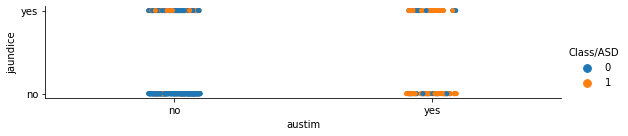

In [ ]:
sns.catplot(x="austim", y="jaundice", hue="Class/ASD",orient="v", height=2.0, aspect=4, data=train_df)


In [ ]:
print(train_df.austim.value_counts())
print(train_df.jaundice.value_counts())


no     683
yes    117
Name: austim, dtype: int64
no     604
yes    196
Name: jaundice, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_count = list()

for col in train_df:
    if train_df[col].dtype == 'category':
        
        if len(list(train_df[col].unique())) <= 2:            
            le.fit(train_df[col])            
            train_df[col] = le.transform(train_df[col])
            test_df[col] = le.transform(test_df[col])
                        
            le_count.append(col)
            
print('%d columns were label encoded.' % len(le_count))
print(le_count)

4 columns were label encoded.
['gender', 'jaundice', 'austim', 'used_app_before']


In [ ]:
train_df['flag_ja'] = (train_df['jaundice'] * train_df['austim']).apply(lambda x: 1 if x == 1 else 0)
print(train_df["flag_ja"].value_counts())

test_df['flag_ja'] = (test_df['jaundice'] * test_df['austim']).apply(lambda x: 1 if x == 1 else 0)
print(test_df["flag_ja"].value_counts())


0    759
1     41
Name: flag_ja, dtype: int64
0    191
1      9
Name: flag_ja, dtype: int64


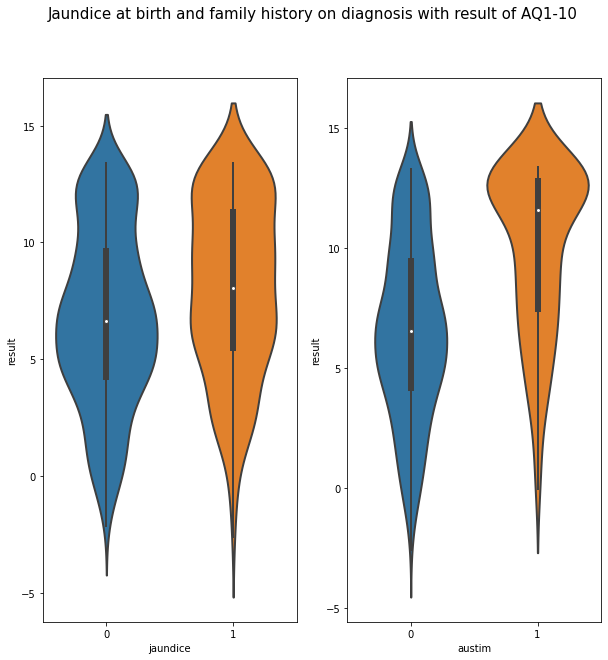

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(10, 10))
sns.violinplot(x= train_df.jaundice, y=train_df.result, edgecolor='black', linewidth=2, ax=ax[0])
sns.violinplot(x= train_df.austim, y=train_df.result, edgecolor='black', linewidth=2, ax=ax[1])
f.suptitle("Jaundice at birth and family history on diagnosis with result of AQ1-10", size=15)
plt.show()

In [ ]:
train_df["SumScores"] = 0

for i in range(10):
    query = str(i+1)
    col = "A" + query+"_Score"
    train_df["SumScores"] += train_df[col]
    
test_df["SumScores"] = 0

for i in range(10):
    query = str(i+1)
    col = "A" + query+"_Score"
    test_df["SumScores"] += test_df[col]

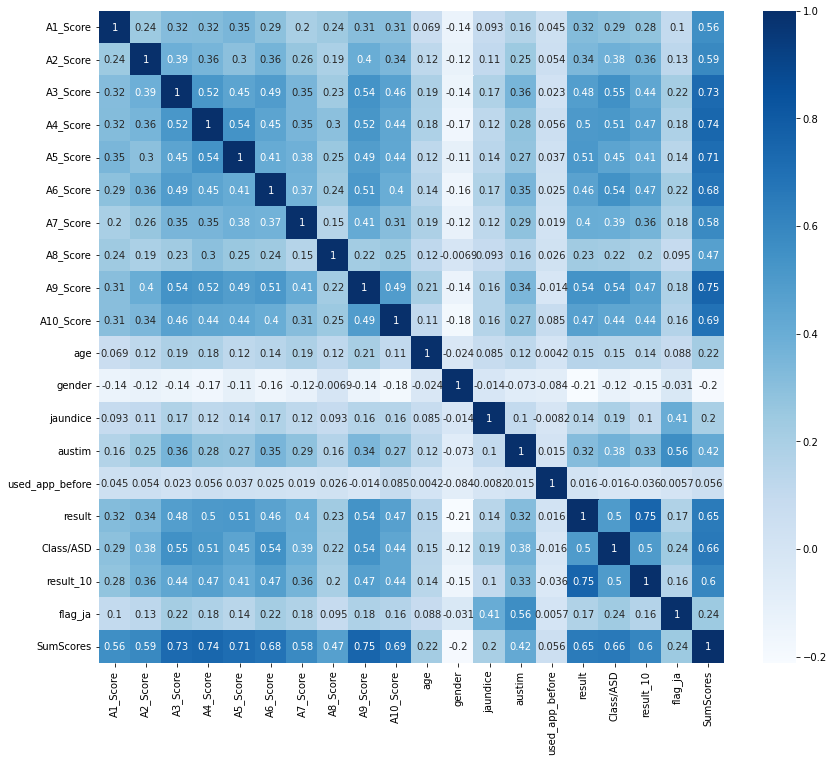

In [ ]:
corr = train_df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap="Blues", annot=True);

In [ ]:
correlations = train_df.corr()["Class/ASD"].sort_values()

print('Most Positive Correlations:\n', correlations.tail(5))
print('\nMost Negative Correlations:\n', correlations.head(5))

Most Positive Correlations:
 A9_Score     0.538688
A6_Score     0.542588
A3_Score     0.549618
SumScores    0.661272
Class/ASD    1.000000
Name: Class/ASD, dtype: float64

Most Negative Correlations:
 gender            -0.124789
used_app_before   -0.015853
age                0.146376
jaundice           0.190769
A8_Score           0.219034
Name: Class/ASD, dtype: float64


In [ ]:
train_df["age_group"].value_counts()

adults         683
adolescents    108
children         9
Name: age_group, dtype: int64

In [ ]:
cat_vars = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
            'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation', "flag_ja", "result_10"]

cont_vars = ['age', 'result', "SumScores"]

dep_var = 'Class/ASD'

In [ ]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))

to = TabularPandas(train_df, procs=[Categorify, FillMissing,Normalize],
                   y_names=dep_var, cat_names = cat_vars, cont_names = cont_vars,
                   splits=splits)

dls = to.dataloaders(bs=16)
learn = tabular_learner(dls, metrics=rmse)

learn.fit_one_cycle(30) 

epoch,train_loss,valid_loss,_rmse,time
0,0.229262,0.277083,0.526386,00:00
1,0.185449,0.099910,0.316086,00:00
2,0.164377,0.115562,0.339944,00:00
3,0.150883,0.143711,0.379092,00:00
4,0.151973,0.097780,0.312698,00:00
5,0.141685,0.080282,0.283341,00:00
6,0.124147,0.108898,0.329997,00:00
7,0.125653,0.077581,0.278534,00:00
8,0.110100,0.086403,0.293945,00:00
9,0.106409,0.107884,0.328457,00:00


In [ ]:
dl = learn.dls.test_dl(test_df)
preds = learn.get_preds(dl=dl)[0].numpy() 
sub_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bsightai/Task1/sample_submission.csv')

In [ ]:
sub_df["Class/ASD"]= preds
sub_df.to_csv('submission.csv', index=False)
sub_df

,ID,Class/ASD
0,1,0.072275
1,2,0.078687
2,3,0.271773
3,4,0.033752
4,5,0.189070
...,...,...
195,196,0.058545
196,197,0.287689
197,198,0.014168
198,199,0.857151
